#### Import all libraries

In [58]:
from __future__ import print_function
import os
import collections
import SimpleITK as sitk
import numpy as np
import six
import radiomics
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm, getTestCase
import sys
import logging as logger
import time
import json
import os
import logging.config
import pandas as pd
import gc
import math

#### Get the grayscale image, the mask and the cropped image, cropped mask

In [67]:
%%time
# Create the variables for image and label
global image_1, label_1

# Path of the images used in REV analysis
path ='D:\\Ankita PhD\\pyradiomics\\data\\data16.nrrd'

# Read the nrrd image using the SITK library. Nrrd images are 8-bit images with intensity values between 0 to 255
image_1 = sitk.ReadImage(path) 

# here the window_size refers to the region of mask that will be used to segment the ROI from the image. The window
# sizes increase with every iteration
window_size = 500

# the size of the mask (same as label) should be the same as that of the image
mask_x = image_1.GetWidth()
mask_y = image_1.GetWidth()
mask_z = image_1.GetWidth()

settings = {}
settings['label'] = 255

i_loc = int((mask_x - window_size)/2)
j_loc = int((mask_y - window_size)/2)
k_loc = int((mask_z - window_size)/2)

# Generate the mask
full_mask = np.zeros((mask_x, mask_y, mask_z), dtype = np.uint8)
full_mask[i_loc:i_loc+window_size,j_loc:j_loc+window_size,k_loc:k_loc+window_size] = 255
#print("Window Location", str(i_loc), str(i_loc+window_size), str(j_loc), str(j_loc+window_size), str(k_loc), str(k_loc+window_size))
label_1 = sitk.GetImageFromArray(full_mask, isVector=False)
label_1.CopyInformation(image_1)

bb, correctedMask = imageoperations.checkMask(image_1, label_1, label=255)
if correctedMask is not None:
    label_1 = correctedMask
croppedImage, croppedMask = imageoperations.cropToTumorMask(image_1, label_1, bb)

Wall time: 11.8 s


In [68]:
i_loc, j_loc, k_loc

(250, 250, 250)

In [69]:
im_exp = sitk.GetArrayFromImage(croppedImage)
im_exp

array([[[117, 121, 124, ..., 152, 144, 104],
        [136, 135, 130, ..., 156, 149, 122],
        [131, 130, 129, ..., 152, 145, 135],
        ...,
        [122, 124, 133, ..., 136, 133, 140],
        [130, 130, 129, ..., 148, 145, 143],
        [130, 129, 128, ..., 148, 144, 131]],

       [[117, 117, 117, ..., 143, 134,  98],
        [133, 124, 122, ..., 140, 138, 122],
        [121, 124, 128, ..., 153, 142, 133],
        ...,
        [115, 124, 124, ..., 136, 129, 130],
        [129, 128, 126, ..., 148, 145, 134],
        [138, 136, 133, ..., 145, 139, 125]],

       [[131, 122, 113, ..., 143, 138, 104],
        [128, 112, 116, ..., 139, 139, 126],
        [117, 121, 125, ..., 154, 145, 140],
        ...,
        [104, 120, 117, ..., 136, 134, 139],
        [115, 122, 130, ..., 153, 144, 135],
        [136, 138, 135, ..., 144, 142, 130]],

       ...,

       [[133, 131, 131, ..., 119, 133, 133],
        [135, 121, 130, ..., 133, 136, 139],
        [135, 131, 140, ..., 133, 138, 139

In [70]:
np.amin(im_exp)

0

In [71]:
np.amax(im_exp)

255

Text(0.5, 1.0, 'Cropped Label #1')

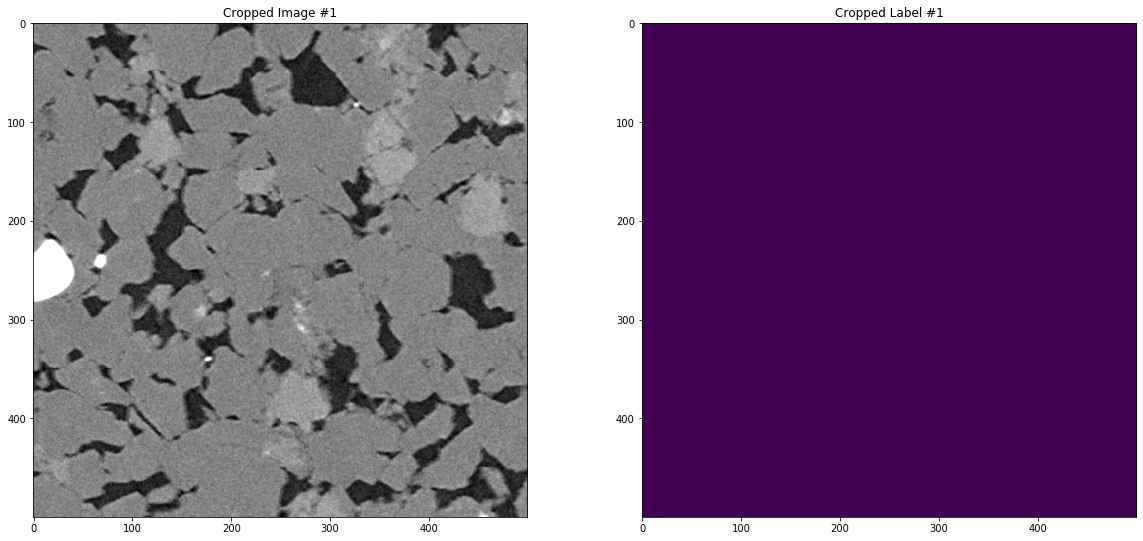

In [72]:
plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(croppedImage)[2,:,:], cmap="gray")

plt.title("Cropped Image #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(croppedMask)[2,:,:])        
plt.title("Cropped Label #1")

Text(0.5, 1.0, 'Original Label #1')

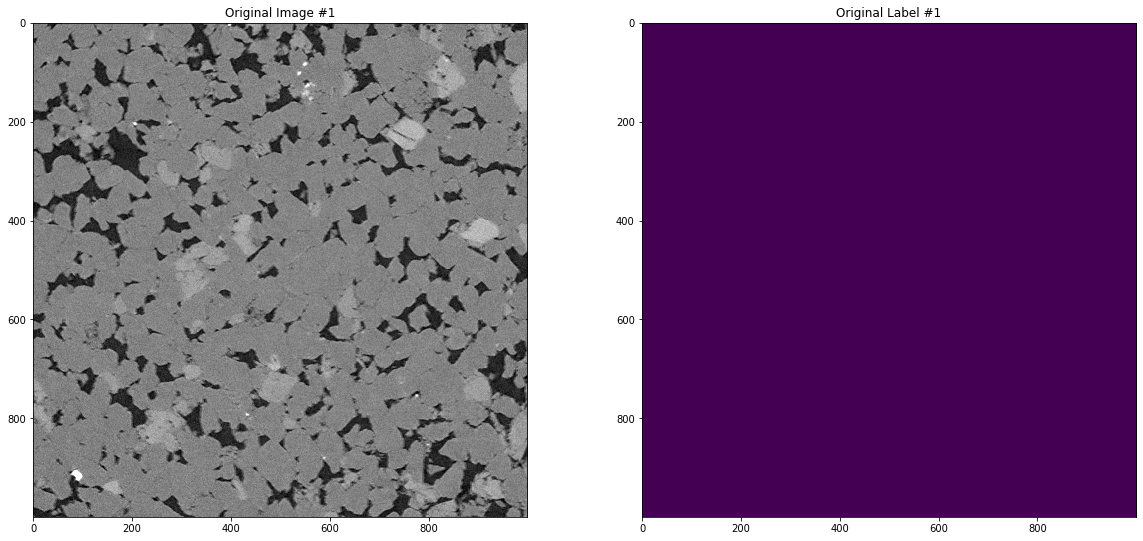

In [73]:
# Display the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[125,:,:], cmap="gray")
plt.title("Original Image #1")
plt.subplot(2,2,2)
plt.imshow(full_mask[125,:,:], vmin = 0, vmax=255)        
plt.title("Original Label #1")